<a href="https://colab.research.google.com/github/Atharva-Gaykar/Deep_Learning/blob/main/notebooks/image_data/Tumor_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Through this project: Brain Tumor Type Classification using MRI Images
I developed a deep learning model to classify MRI scans into four categories: Glioma, Meningioma, Pituitary, and Normal.

Understood the medical differences between tumor types and how they appear in brain MRI scans.

Used multi-class classification techniques and adapted the architecture accordingly with a softmax activation in the output layer.

Preprocessed the image dataset, structured in folders by class, using ImageDataGenerator with augmentation.

Fine-tuned a pre-trained CNN model (e.g., VGG19) for improved performance on a relatively small medical dataset.

Modified the model’s classifier layers to include a dense layer with softmax to output probabilities for each tumor type.

Trained the model using categorical cross-entropy loss, suitable for multi-class problems.

Evaluated performance using accuracy, classification reports, and confusion matrices to assess prediction quality per class.

Learned to handle class imbalance, interpret model predictions, and visualize tumor class probabilities.

ACTIVATION FUNCTION USED

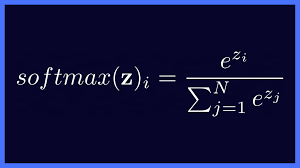

LOSS FUNCTION USED

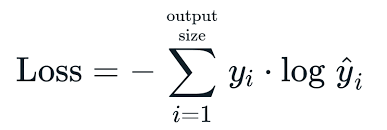

In [ ]:
import kagglehub


path = kagglehub.dataset_download("akrashnoor/brain-tumor")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor


In [ ]:
import os
dataset_path = "/kaggle/input/brain-tumor"

In [ ]:
work_dir = os.path.join(dataset_path, "4 classes")

In [ ]:
data_classes = os.listdir(work_dir)
data_classes

['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'normal']

In [ ]:
img_dt=[]
for dt_class in data_classes:
    class_dir = os.path.join(work_dir , dt_class)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_dt.append((os.path.join(dt_class, filename), dt_class))

In [ ]:

import pandas as pd
work_dt = pd.DataFrame(img_dt, columns=['filename', 'class_target'])


work_dt

,filename,class_target
0,pituitary_tumor/P_343.jpg,pituitary_tumor
1,pituitary_tumor/P_739.jpg,pituitary_tumor
2,pituitary_tumor/P_182.jpg,pituitary_tumor
3,pituitary_tumor/P_661.jpg,pituitary_tumor
4,pituitary_tumor/P_199.jpg,pituitary_tumor
...,...,...
3091,normal/N_30.jpg,normal
3092,normal/N_207.jpg,normal
3093,normal/N_221.jpg,normal
3094,normal/N_200.jpg,normal


<ipython-input-7-3114785700>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=work_dt, x="class_target", palette='coolwarm')


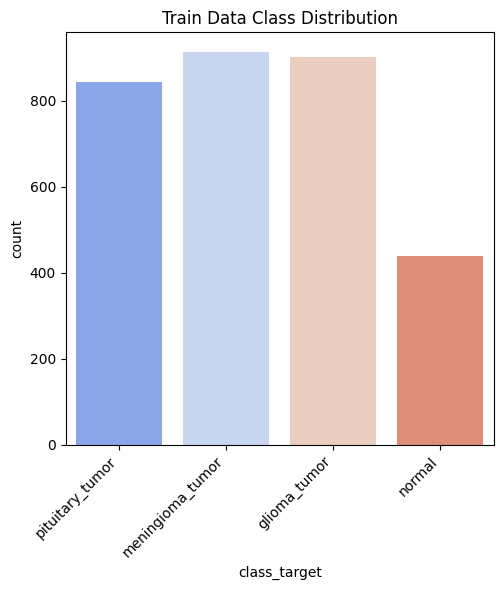

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=work_dt, x="class_target", palette='coolwarm')
plt.title("Train Data Class Distribution")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:


from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(work_dt, test_size=0.2, random_state=42, stratify=work_dt['class_target'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['class_target'])

print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")



Train set size: 2476
Validation set size: 310
Test set size: 310


<ipython-input-9-2654318616>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="class_target", palette='coolwarm')
<ipython-input-9-2654318616>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=val_df, x="class_target", palette='coolwarm')
<ipython-input-9-2654318616>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x="class_target", palette='coolwarm')


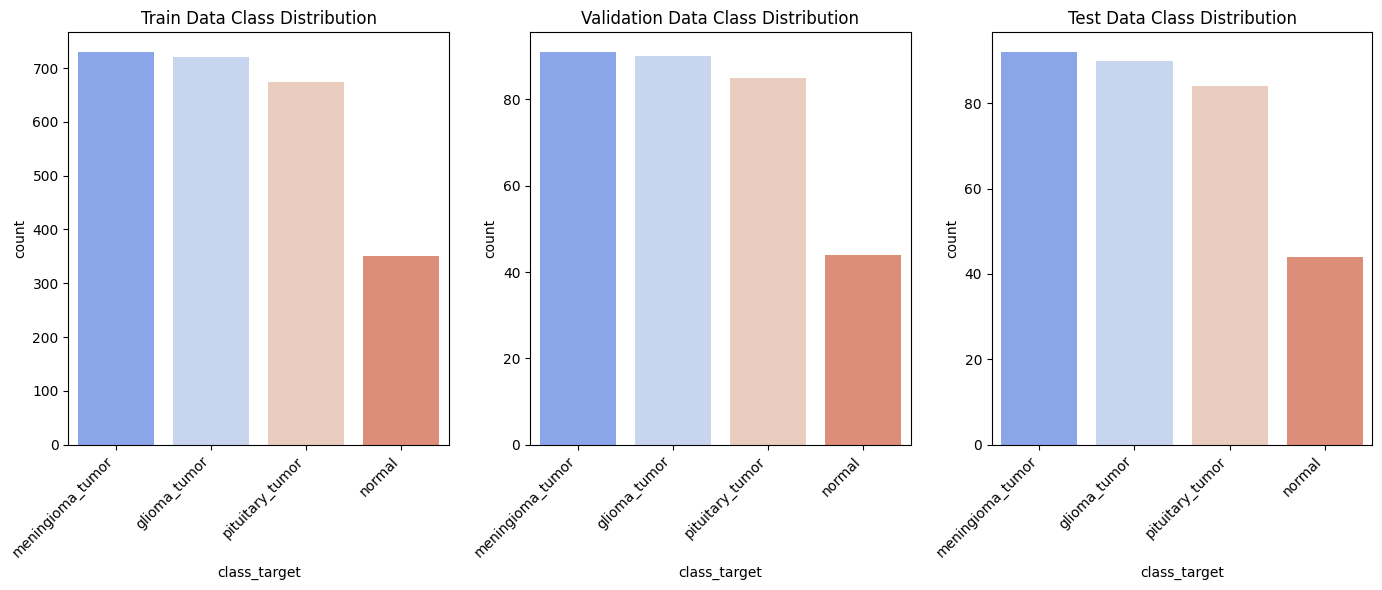

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x="class_target", palette='coolwarm')
plt.title("Train Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(data=val_df, x="class_target", palette='coolwarm')
plt.title("Validation Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(data=test_df, x="class_target", palette='coolwarm')
plt.title("Test Data Class Distribution")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
train_df['class_target'].value_counts()

,count
class_target,
meningioma_tumor,730
glioma_tumor,721
pituitary_tumor,675
normal,350


In [ ]:
import cv2,random


def apply_sharpening(image):


    blurred = cv2.GaussianBlur(image, (0, 0), 3)


    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    return sharpened



<ipython-input-12-2675716282>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_images = train_df.groupby('class_target').apply(lambda x: x.sample(1)).reset_index(drop=True)


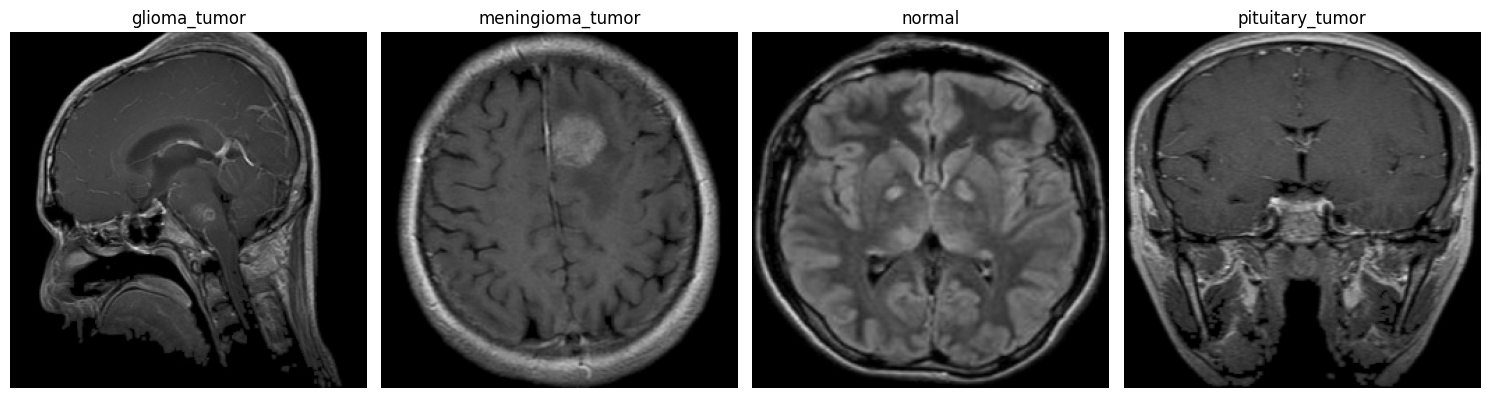

In [ ]:
# prompt: plot img in previous scake

sample_images = train_df.groupby('class_target').apply(lambda x: x.sample(1)).reset_index(drop=True)

plt.figure(figsize=(15, 5))
for i, row in sample_images.iterrows():
    img_path = os.path.join(work_dir, row['filename'])
    label = row['class_target']
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(img_rgb)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

🧪 Image Filters Used for Data Augmentation
To improve model generalization and simulate real-world variability in MRI scans, I applied the following image filtering techniques as part of data augmentation:

1. 🌀 Gaussian Filter
Applies Gaussian blur to smooth the image.

Reduces high-frequency noise and fine details.

Helps the model become robust to low-contrast or noisy scans.

2. 🎯 Bilateral Filter
Smoothens images while preserving edges.

Useful in medical imaging where boundaries between tumor and tissue are important.

Prevents over-blurring of key structural features.

3. ✨ Sharpening Filter
Enhances edges and fine details in the image.

Makes tumor boundaries clearer, helping the model learn more distinct patterns.

Useful in cases where MRI scans are too soft or low in contrast.

✅ Significance of These Filters in Data Augmentation
Introduces controlled variability in image texture and sharpness.

Helps simulate different MRI machine qualities or scanning conditions.

Makes the model less sensitive to overfitting on perfectly clean training images.

Improves model’s generalization to unseen MRI scans with varying clarity and contrast

In [ ]:
import cv2
import random
import os
import pandas as pd
import numpy as np



def augment_images(dataframe, base_dir, output_dir="aug_images"):

    os.makedirs(output_dir, exist_ok=True)

    class_names = dataframe['class_target'].unique()
    for class_name in class_names:
        class_dir = os.path.join(output_dir, str(class_name))
        os.makedirs(class_dir, exist_ok=True)

    modified_data = []

    for _, row in dataframe.iterrows():
        img_path = os.path.join(base_dir, row['filename'])
        label = row['class_target']


        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not load image {img_path} - skipping")
            continue

        chosen_method = random.choice(['bilateral', 'gaussian', 'sharpen'])

        try:
            if chosen_method == 'bilateral':
                img = cv2.bilateralFilter(img, d=3, sigmaColor=20, sigmaSpace=20)
                suffix = "_bilateral"
            elif chosen_method == 'gaussian':
                img = cv2.GaussianBlur(img, (5,5), 0)
                suffix = "_gaussian"
            else:  # sharpen
                img = apply_sharpening(img)
                suffix = "_sharpened"

            orig_filename = os.path.basename(img_path)
            new_filename = f"{os.path.splitext(orig_filename)[0]}{suffix}.jpg"
            class_dir = os.path.join(output_dir, str(label))
            new_path = os.path.join(class_dir, new_filename)

            if img is not None:
                cv2.imwrite(new_path, img)

                rel_path = os.path.join(str(label), new_filename)
                modified_data.append({'filename': rel_path, 'class_target': label})
            else:
                print(f"Warning: Processing failed for {img_path}")

        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")
            continue

    return pd.DataFrame(modified_data)

new_train_aug_df = augment_images(train_df, work_dir, output_dir="/content/augmented_train")

In [ ]:
new_train_aug_df

,filename,class_target
0,meningioma_tumor/M_125_bilateral.jpg,meningioma_tumor
1,meningioma_tumor/M_106_bilateral.jpg,meningioma_tumor
2,glioma_tumor/G_202_gaussian.jpg,glioma_tumor
3,meningioma_tumor/M_378_sharpened.jpg,meningioma_tumor
4,pituitary_tumor/P_724_bilateral.jpg,pituitary_tumor
...,...,...
2471,meningioma_tumor/M_153_sharpened.jpg,meningioma_tumor
2472,normal/N_112_bilateral.jpg,normal
2473,pituitary_tumor/P_649_bilateral.jpg,pituitary_tumor
2474,pituitary_tumor/P_244_sharpened.jpg,pituitary_tumor


In [ ]:


import os
import shutil

output_dir = "/content/augmented_train"

# Create subdirectories for each class in the output_dir
class_names = train_df['class_target'].unique() # Using train_df from preceding code
for class_name in class_names:
    class_dir = os.path.join(output_dir, str(class_name))
    os.makedirs(class_dir, exist_ok=True)


for index, row in train_df.iterrows():
    original_img_path = os.path.join(work_dir, row['filename'])
    class_label = row['class_target']
    destination_dir = os.path.join(output_dir, str(class_label))
    destination_img_path = os.path.join(destination_dir, os.path.basename(row['filename']))

    try:
        shutil.copy(original_img_path, destination_img_path)

    except FileNotFoundError:
        print(f"Warning: File not found at {original_img_path}")
    except Exception as e:
        print(f"Error copying file {original_img_path} to {destination_img_path}: {str(e)}")

print(f"All original images from train_df copied to class-specific subdirectories in {output_dir}")


All original images from train_df copied to class-specific subdirectories in /content/augmented_train


In [ ]:
new_train_link="/content/augmented_train"
img_dt=[]
for dt_class in data_classes:
    class_dir = os.path.join(new_train_link , dt_class)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_dt.append((os.path.join(dt_class, filename), dt_class))

In [ ]:
aug_train_df=pd.DataFrame(img_dt, columns=['filename', 'class_target'])
aug_train_df

,filename,class_target
0,pituitary_tumor/P_366.jpg,pituitary_tumor
1,pituitary_tumor/P_825_bilateral.jpg,pituitary_tumor
2,pituitary_tumor/P_702.jpg,pituitary_tumor
3,pituitary_tumor/P_431.jpg,pituitary_tumor
4,pituitary_tumor/P_805_bilateral.jpg,pituitary_tumor
...,...,...
4947,normal/N_201_sharpened.jpg,normal
4948,normal/N_60_gaussian.jpg,normal
4949,normal/N_171.jpg,normal
4950,normal/N_360.jpg,normal


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',

    brightness_range=[0.75, 1.25]
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator1= train_datagen.flow_from_dataframe(
    aug_train_df,
    directory='/content/augmented_train',

    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 4952 validated image filenames belonging to 4 classes.


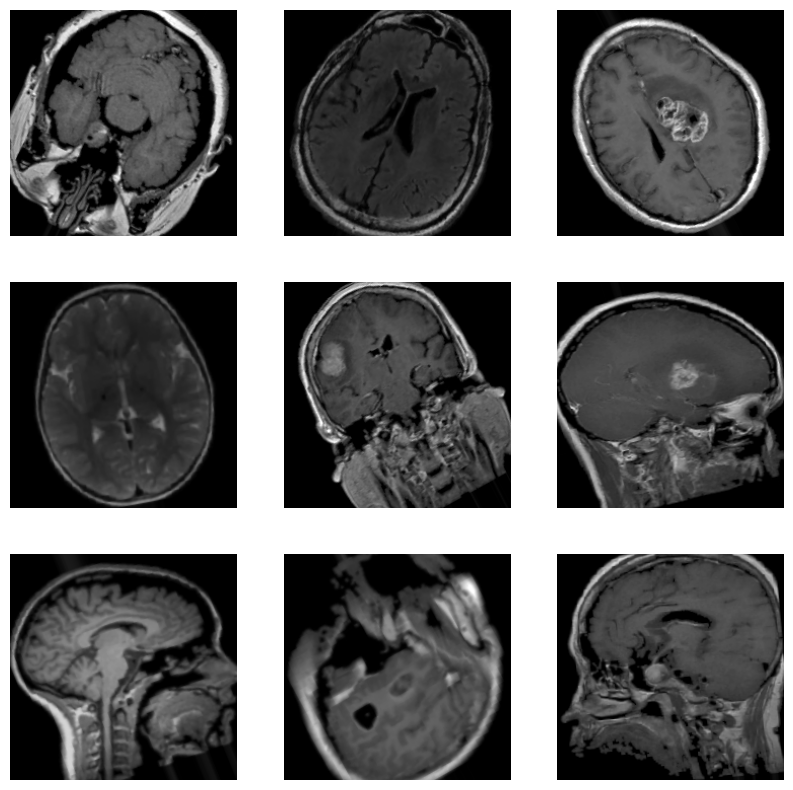

In [ ]:
preview_dt = next(train_generator1)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(preview_dt[0][i])
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


train_labels = aug_train_df['class_target']


class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)

class_weight_dict = dict(enumerate(class_weights))

print("Computed class weights:")
class_weight_dict

Computed class weights:


{0: np.float64(0.8585298196948682),
 1: np.float64(0.8479452054794521),
 2: np.float64(1.7685714285714285),
 3: np.float64(0.917037037037037)}

In [ ]:


import cv2
from os import listdir
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Activation,
    LeakyReLU, PReLU
)

from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.applications.vgg19 import VGG19


def create_model_CNN2(layers, dropout_rate, n_classes, activation="leakyrelu",
                      learning_rate=0.01, l2_reg=0.01):  # Adjusted default l2_reg

    # Load pre-trained VGG19 model
    conv_base_2 = VGG19(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Set trainability for specific layers
    conv_base_2.trainable = True
    set_trainable = False

    for layer in conv_base_2.layers:
        if layer.name == 'block4_conv3':
            set_trainable = True
        layer.trainable = set_trainable

    # Print layer trainability status
    for layer in conv_base_2.layers:
        print(layer.name, layer.trainable)

    # Create model
    model = Sequential()
    model.add(conv_base_2)
    model.add(Flatten())  # Flatten extracted features

    # Fully Connected Layers
    for nodes in layers:
        model.add(Dense(nodes, kernel_initializer=tf.keras.initializers.HeUniform(),
                        kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        model.add(BatchNormalization())

        # Activation Choices
        if activation == "prelu":
            model.add(PReLU())
        elif activation == "leakyrelu":
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Activation(activation))

        # Apply Dropout if specified
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(n_classes, activation='softmax'))

    # Compile Model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
layers = [1024]
dropout_rate = 0.3
n_classes = 4
learning_rate = 0.00001
l2_reg = 0.0001


model2 = create_model_CNN2(layers, dropout_rate, n_classes, learning_rate=learning_rate, l2_reg=l2_reg)
model2.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
input_layer_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_conv4 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 True
block4_conv4 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_conv4 True
block5_pool True


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,723,716 (174.42 MB)

 Trainable params: 39,856,132 (152.04 MB)

 Non-trainable params: 5,867,584 (22.38 MB)

UNFREEZING STARTS FROM layer.name == 'block4_conv3'

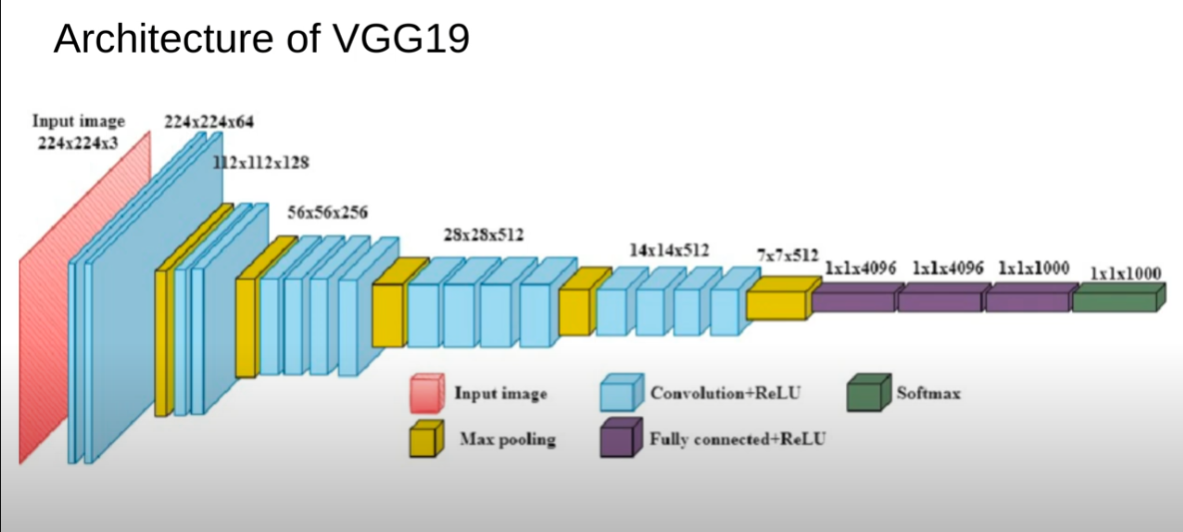

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=work_dir,
    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=work_dir,
    x_col='filename',
    y_col='class_target',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 310 validated image filenames belonging to 4 classes.
Found 310 validated image filenames belonging to 4 classes.


🧠 Note: I also tried using ResNet to improve accuracy, but surprisingly, VGG19 outperformed it. This might be due to the smaller dataset size and the fact that VGG19’s simpler architecture was more effective at capturing the fine-grained features in MRI images.



### 🤔 Why VGG19 Performed Better Than ResNet in This Project

* **Data Size Matters**: VGG19 may perform better on **small medical datasets** like MRI scans, where **deeper networks like ResNet** can easily **overfit** or **fail to generalize** due to their complexity.

* **Feature Sensitivity**: VGG19 uses **uniform 3x3 filters** and **stacked convolutional layers** which may better capture **fine textures and localized features** in brain MRIs, especially when tumors have subtle patterns.

* **Model Simplicity**: ResNet has **skip connections** and is designed for **very deep architectures**. For simpler tasks or lower data diversity, its complexity can become a disadvantage, while VGG19’s **straightforward architecture** remains more stable.

* **Pretrained Weights Compatibility**: If you used ImageNet pretrained weights, VGG19 might have transferred **more relevant low-level features** (edges, textures) for your dataset than ResNet.

* **Training Configuration**: Sometimes hyperparameters (like learning rate, batch size, or augmentation strategy) might suit VGG19 better than ResNet by default unless specifically tuned for ResNet.

---



Here are some key points about using `class_weight=class_weight_dict` in Keras to handle **class imbalance**, along with the formula it follows:

---

### 🔹 Purpose of `class_weight` in Keras:

* It adjusts the **loss contribution** from each class during training.
* Helps the model **not bias toward the majority class** in imbalanced datasets.
* Useful especially for **classification tasks** where one or more classes are underrepresented.

---

### 🔹 How It Works:

* You pass a dictionary:

  ```python
  class_weight = {0: 2.0, 1: 1.0, 2: 1.5}  
  ```

  This means class `0` gets more importance in loss calculation than `1` or `2`.

---

### 🔹 Formula Used Internally by Keras:

During training, the loss function is scaled like this:

$$
\text{Weighted Loss} = \frac{1}{N} \sum_{i=1}^{N} w_{y_i} \cdot \mathcal{L}(y_i, \hat{y}_i)
$$

Where:

* $w_{y_i}$ = weight of the true class of the $i^{th}$ sample
* $\mathcal{L}(y_i, \hat{y}_i)$ = loss for the $i^{th}$ prediction
* $N$ = total number of samples

---

### 🔹 Automatically Computing Class Weights:

You can compute it using:

```python
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))
```

This uses the formula:

$$
w_c = \frac{n}{k \cdot n_c}
$$

Where:

* $w_c$ = weight of class $c$
* $n$ = total number of samples
* $k$ = number of classes
* $n_c$ = number of samples in class $c$

---



In [ ]:
history2 = model2.fit(
    train_generator1,
    epochs=30,
    validation_data=validation_generator,
    class_weight=class_weight_dict,
    verbose=1,callbacks=[early_stopping]
)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 182s 739ms/step - accuracy: 0.4983 - loss: 1.3667 - val_accuracy: 0.7742 - val_loss: 0.8378
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 564ms/step - accuracy: 0.7751 - loss: 0.7488 - val_accuracy: 0.8226 - val_loss: 0.6097
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 87s 563ms/step - accuracy: 0.8396 - loss: 0.6159 - val_accuracy: 0.8903 - val_loss: 0.5501
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 566ms/step - accuracy: 0.8764 - loss: 0.5142 - val_accuracy: 0.8742 - val_loss: 0.5686
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 88s 563ms/step - accuracy: 0.8982 - loss: 0.4553 - val_accuracy: 0.9161 - val_loss: 0.4751
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 141s 560ms/step - accuracy: 0.9034 - loss: 0.4435 - val_accuracy: 0.9097 - val_loss: 0.5137
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 87s 561ms/step - accuracy: 0.9255 - loss: 0.3828 - val_accuracy: 0.9194 - val_loss: 0.4839
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 86s 555ms/step - accuracy: 0.9379 - loss:



---

### 📈 Impact of Data Augmentation on Model Performance

* Initially, I trained the **VGG19 model** **without any data augmentation**, and the **validation accuracy** plateaued at **\~87%**.
* After applying **image enhancement techniques** such as:

  * **Gaussian filter** (for noise reduction),
  * **Sharpening filter** (to enhance edges), and
  * **Bilateral filter** (for preserving edges while smoothing),

  the model was able to **generalize better** to unseen data.
* As a result, the **validation accuracy improved significantly** to **\~93.5%**.

✅ This shows how **targeted data augmentation** can boost performance in medical imaging tasks by increasing the diversity of training samples.

---



In [ ]:
# prompt: test accuracy

results2 = model2.evaluate(test_generator)

print(f"Test Loss: {results2[0]}")
print(f"Test Accuracy: {results2[1]}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.9331 - loss: 0.4148
Test Loss: 0.3845531940460205
Test Accuracy: 0.9451612830162048


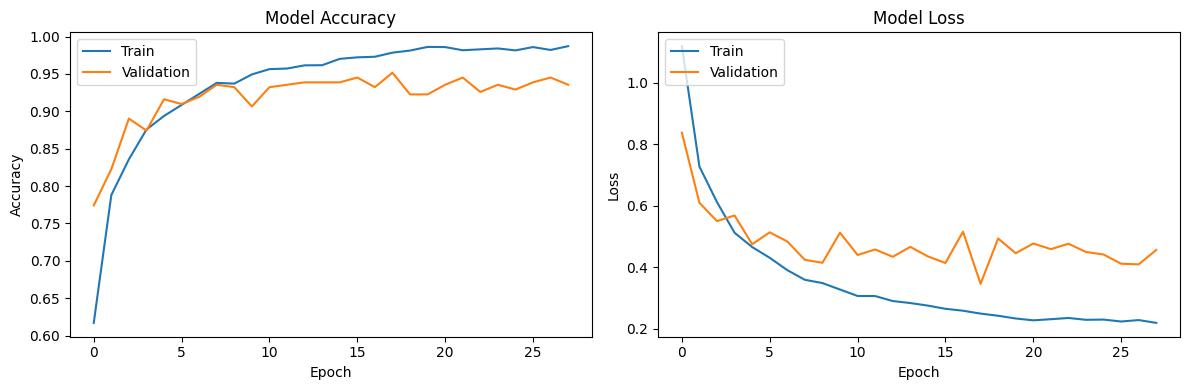

In [ ]:
# prompt: plot history2

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
from tabulate import tabulate

test_predictions_prob = model2.predict(test_generator)
test_predictions = np.argmax(test_predictions_prob, axis=1)

test_true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())


report_dict = classification_report(test_true_labels, test_predictions, target_names=class_names, output_dict=True)


report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df.round(4)


print(tabulate(report_df, headers='keys', tablefmt='fancy_grid'))


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step
╒══════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│                  │   precision │   recall │   f1-score │   support │
╞══════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ glioma_tumor     │      0.975  │   0.8667 │     0.9176 │   90      │
├──────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ meningioma_tumor │      0.9091 │   0.9783 │     0.9424 │   92      │
├──────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ normal           │      0.9149 │   0.9773 │     0.9451 │   44      │
├──────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ pituitary_tumor  │      0.9762 │   0.9762 │     0.9762 │   84      │
├──────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy         │      0.9452 │   0.9452 │     0.9452 │    0.9452 │
├──────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg        │      0.9438 │  

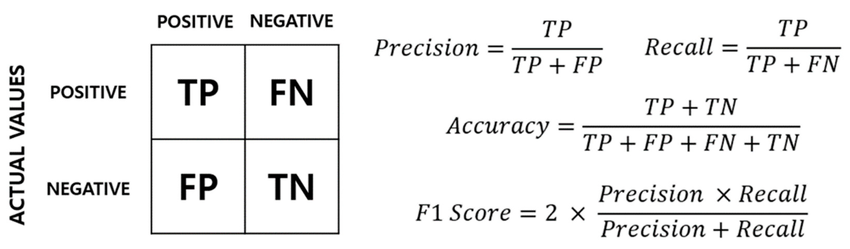

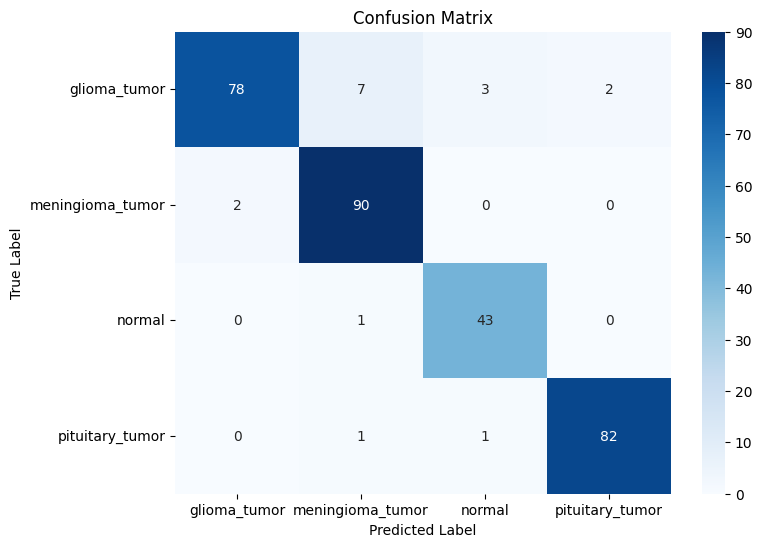

In [ ]:


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tabulate import tabulate


cm = confusion_matrix(test_true_labels, test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
